<a href="https://colab.research.google.com/github/MiguelMussalam/predicao_ia_notas_enem/blob/main/Tratamento_dos_dados_brutos_do_ENEM_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install ydata-profiling
#!pip install scikit-learn
#pd.set_option('display.max_columns', None)  # Mostra todas as colunas
#pd.set_option('display.max_rows', None)  # Mostra todas as linhas

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
drive.mount('/content/drive',force_remount=True)
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Pasta de dados ENEM (Funciona no caminho que fiz no meu drive [miguel], se for rodar no seu drive, tenta criar um caminho igual no drive)**

In [ ]:
caminho_dados_enem = ('/content/drive/My Drive/Faculdade/5º Semestre/PCG/dataset_enem/microdados_enem_2023/')

# DADOS BRUTOS ENEM 2023


# Microdados

In [ ]:
microdados_brutos_enem_2023 = pd.read_csv(f'{caminho_dados_enem}DADOS/MICRODADOS_ENEM_2023.csv', sep = ';', encoding='latin1', low_memory= False)

In [ ]:
# - mostrar somente o nome das colunas
#microdados_brutos_enem_2023.columns.tolist()

In [ ]:
# - baixar parte dos dados (mudar código para baixar csv ou xlsx)
#qtd_linhas = 500
#subset = microdados_brutos_enem_2023.head(qtd_linhas)
# - Relatório microdados ENEM

#subset.to_excel(f'microdados_enem_2023_bruto_{qtd_linhas}_linhas.xlsx', index=False)
#files.download(f'microdados_enem_2023_bruto_{qtd_linhas}_linhas.xlsx')

# - mostrar tabela
#microdados_brutos_enem_2023

In [ ]:
# - Mostrar o tipo, vales, qtd_valores de todas as colunas
#for coluna in microdados_brutos_enem_2023.columns:
#    print(f'\nColuna: {coluna}')
#    print(microdados_brutos_enem_2023[coluna].value_counts(dropna=False))

In [ ]:
# - ??
#microdados_brutos_enem_2023.TP_ENSINO.value_counts(dropna=False)
#microdados_brutos_enem_2023

In [ ]:
#microdados_brutos_enem_2023.describe()


# Tratamento dos dados - Microdados 2023

*   **Tratar tudo, depois fazer a estatística descritiva dos dados tratados**
*   **depois disso - Análise exploratória (???)**

In [ ]:
microdados_tratados_enem_2023 = microdados_brutos_enem_2023.copy()
# - Remover colunas
microdados_tratados_enem_2023 = microdados_tratados_enem_2023.drop({'NU_INSCRICAO', 'NU_ANO', 'TP_ENSINO', 'CO_MUNICIPIO_ESC',
                                                                    'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
                                                                    'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
                                                                    'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',
                                                                    'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
                                                                    'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC','CO_PROVA_MT', 'TP_ANO_CONCLUIU'}, axis=1)
# - Remover linhas
microdados_tratados_enem_2023 = microdados_tratados_enem_2023[
    (microdados_tratados_enem_2023['TP_PRESENCA_MT'] == 1) &
    (microdados_tratados_enem_2023['TP_PRESENCA_LC'] == 1) &
    (microdados_tratados_enem_2023['TP_PRESENCA_CH'] == 1) &
    (microdados_tratados_enem_2023['TP_PRESENCA_CN'] == 1) &
    (microdados_tratados_enem_2023['NU_NOTA_MT'] > 0) &
    (microdados_tratados_enem_2023['NU_NOTA_LC'] > 0) &
    (microdados_tratados_enem_2023['NU_NOTA_CH'] > 0) &
    (microdados_tratados_enem_2023['NU_NOTA_CN'] > 0) &
    (microdados_tratados_enem_2023['TP_STATUS_REDACAO'] == 1)
]

microdados_tratados_enem_2023 = microdados_tratados_enem_2023.drop({'TP_PRESENCA_MT', 'TP_PRESENCA_LC', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN' ,'TP_STATUS_REDACAO'}, axis= 1)

# - Tratamento de valores de colunas
microdados_tratados_enem_2023['TP_SEXO'] = microdados_tratados_enem_2023['TP_SEXO'].map({'M': 0, 'F': 1})
microdados_tratados_enem_2023['NO_MUNICIPIO_PROVA'] = le.fit_transform(microdados_tratados_enem_2023['NO_MUNICIPIO_PROVA'])
microdados_tratados_enem_2023['SG_UF_PROVA'] = le.fit_transform(microdados_tratados_enem_2023['SG_UF_PROVA'])

for i in range(1,10):
  if i == 5:
    continue
  microdados_tratados_enem_2023[f'Q00{i}'] = microdados_tratados_enem_2023[f'Q00{i}'].map(lambda x: ord(x) - ord('A'))

for i in range(10,26):
  microdados_tratados_enem_2023[f'Q0{i}'] = microdados_tratados_enem_2023[f'Q0{i}'].map(lambda x: ord(x) - ord('A'))

# Gera o relatório
#profile = ProfileReport(microdados_tratados_enem_2023, title='Relatório ENEM 2023 Tratado', explorative=True)

# Salva como HTML
#profile.to_file("relatorio_enem2023.html")

In [ ]:
#zeros_ciencias_humanas = (microdados_tratados_enem_2023[microdados_tratados_enem_2023['NU_NOTA_CH'] == 0])
#zeros_ciencias_humanas

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025


In [ ]:
#zeros_matematica = (microdados_tratados_enem_2023[microdados_tratados_enem_2023['NU_NOTA_MT'] == 0])
#zeros_matematica


,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025


In [ ]:
#for coluna in microdados_tratados_enem_2023.columns:
#    print(f'\nColuna: {coluna}')
#    print(microdados_tratados_enem_2023[coluna].value_counts(dropna=False))

In [ ]:
# - Baixar CSV completo
microdados_tratados_enem_2023.to_csv('microdados_tratados_enem_2023.csv', index=False)
files.download('microdados_tratados_enem_2023.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# - Sample de 500 linhas
microdados_tratados_enem_2023_500 = microdados_tratados_enem_2023.head(500)
microdados_tratados_enem_2023_500.to_excel('microdados_tratados_enem_2023_500_linhas.xlsx', index=False)
files.download('microdados_tratados_enem_2023_500_linhas.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# Itens Prova

In [ ]:
#itens_prova_enem_2023 = pd.read_csv(f'{caminho_dados_enem}DADOS/ITENS_PROVA_2023.csv', sep = ';', encoding='latin1', nrows = 15, low_memory= False)

In [ ]:
# - baixar parte dos dados (mudar código para baixar csv ou xlsx)
#itens_prova_enem_2023.to_excel('itens_prova_enem_2023_15_linhas.xlsx', index=False)
#files.download('itens_prova_enem_2023_15_linhas.xlsx')

# - mostrar tabela
#itens_prova_enem_2023

# **Classificação com XGBoost**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dimensões originais: (2569190, 46)
Dimensões após One-Hot: (2569190, 54)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:55:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Acurácia: 0.8152

Matriz de Confusão:
[[    28  27437    119]
 [    47 406159   8540]
 [     1  58788  12719]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.37      0.00      0.00     27584
           1       0.82      0.98      0.90    414746
           2       0.59      0.18      0.27     71508

    accuracy                           0.82    513838
   macro avg       0.60      0.39      0.39    513838
weighted avg       0.77      0.82      0.76    513838



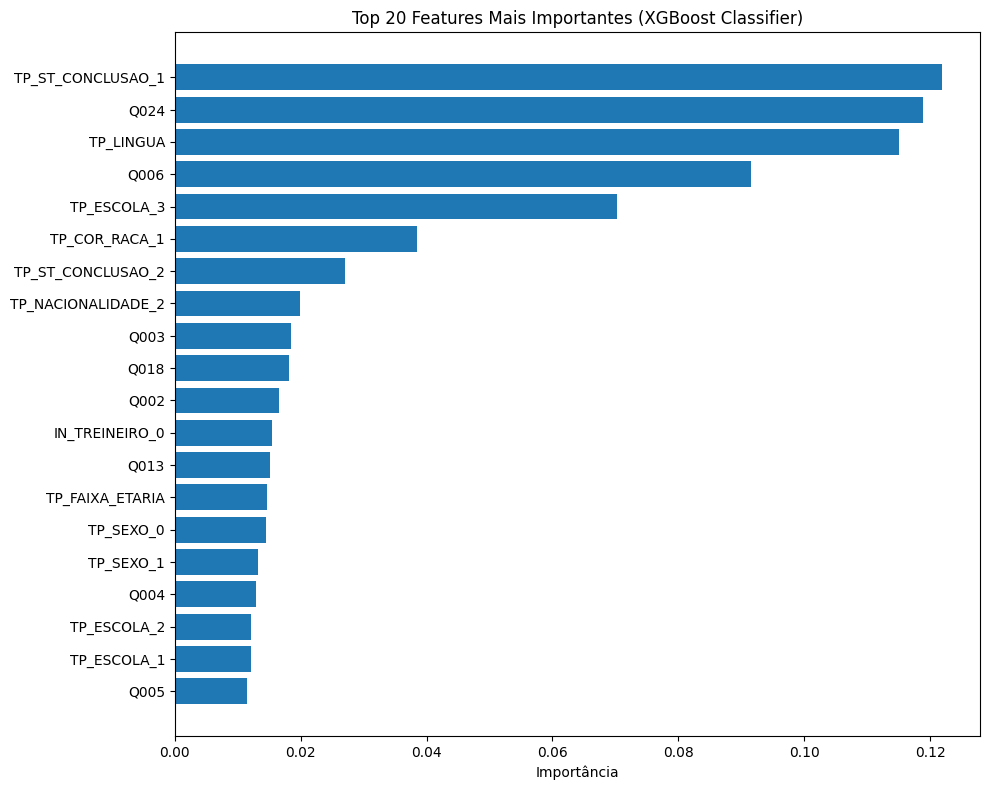

In [5]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar os dados
microdados = pd.read_csv('/content/drive/My Drive/Faculdade/5º Semestre/PCG/tratamento microdados/Dados tratados/microdados_tratados_enem_2023.csv')
print("Dimensões originais:", microdados.shape)

# Colunas a excluir
colunas_excluir = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT','NU_NOTA_LC',
         'NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3',
         'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA']

# Definir variável alvo
alvo = 'NU_NOTA_LC'
colunas_excluir.remove(alvo)

# Separar X e y
X = microdados.drop(columns=[alvo] + colunas_excluir)
y_continuo = microdados[alvo]

# Converter a variável contínua (nota) em classes
def categorizar_nota(nota):
    if nota < 400:
        return 0  # Baixo desempenho
    elif nota < 600:
        return 1  # Médio desempenho
    else:
        return 2  # Alto desempenho

y = y_continuo.apply(categorizar_nota)

# One-Hot Encoding das variáveis categóricas
categorical_cols = [
    'TP_SEXO', 'TP_ESTADO_CIVIL', 'IN_TREINEIRO',
    'TP_COR_RACA', 'TP_ESCOLA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO'
]

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)
print("Dimensões após One-Hot:", X_encoded.shape)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Modelo de classificação
model = XGBClassifier(
    n_estimators=1500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',  # otimizado para grandes volumes
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Treinar o modelo
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação
acc = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {acc:.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Importância das features
feature_names = X_encoded.columns
importances = model.feature_importances_
sorted_idx = importances.argsort()[::-1]
feature_names_sorted = [feature_names[i] for i in sorted_idx]
importances_sorted = importances[sorted_idx]

# Top 20 features
top_n = 20
plt.figure(figsize=(10, 8))
plt.barh(feature_names_sorted[:top_n], importances_sorted[:top_n])
plt.xlabel("Importância")
plt.title("Top 20 Features Mais Importantes (XGBoost Classifier)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [21]:
# - Classe 1
cont_valor_1 = (microdados.NU_NOTA_LC >= 0) & (microdados.NU_NOTA_LC < 401)
cont_valor_1.value_counts()

,count
NU_NOTA_LC,
False,2428521
True,140669


In [20]:
# - Classe 2
cont_valor_2 = (microdados.NU_NOTA_LC >= 401) & (microdados.NU_NOTA_LC < 601)
cont_valor_2.value_counts()

,count
NU_NOTA_LC,
True,2080159
False,489031


In [19]:
# - Classe 3
cont_valor_3 = (microdados.NU_NOTA_LC >= 601) & (microdados.NU_NOTA_LC < 1001)
cont_valor_3.value_counts()

,count
NU_NOTA_LC,
False,2220828
True,348362


# DICIONÁRIO DAS COLUNAS
**Itens prova**

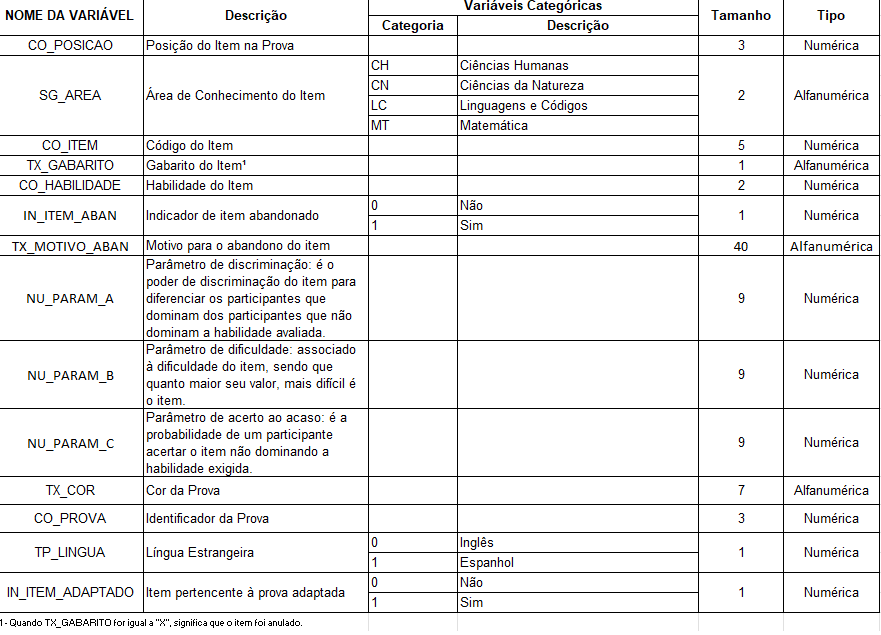

**Microdados_enem**

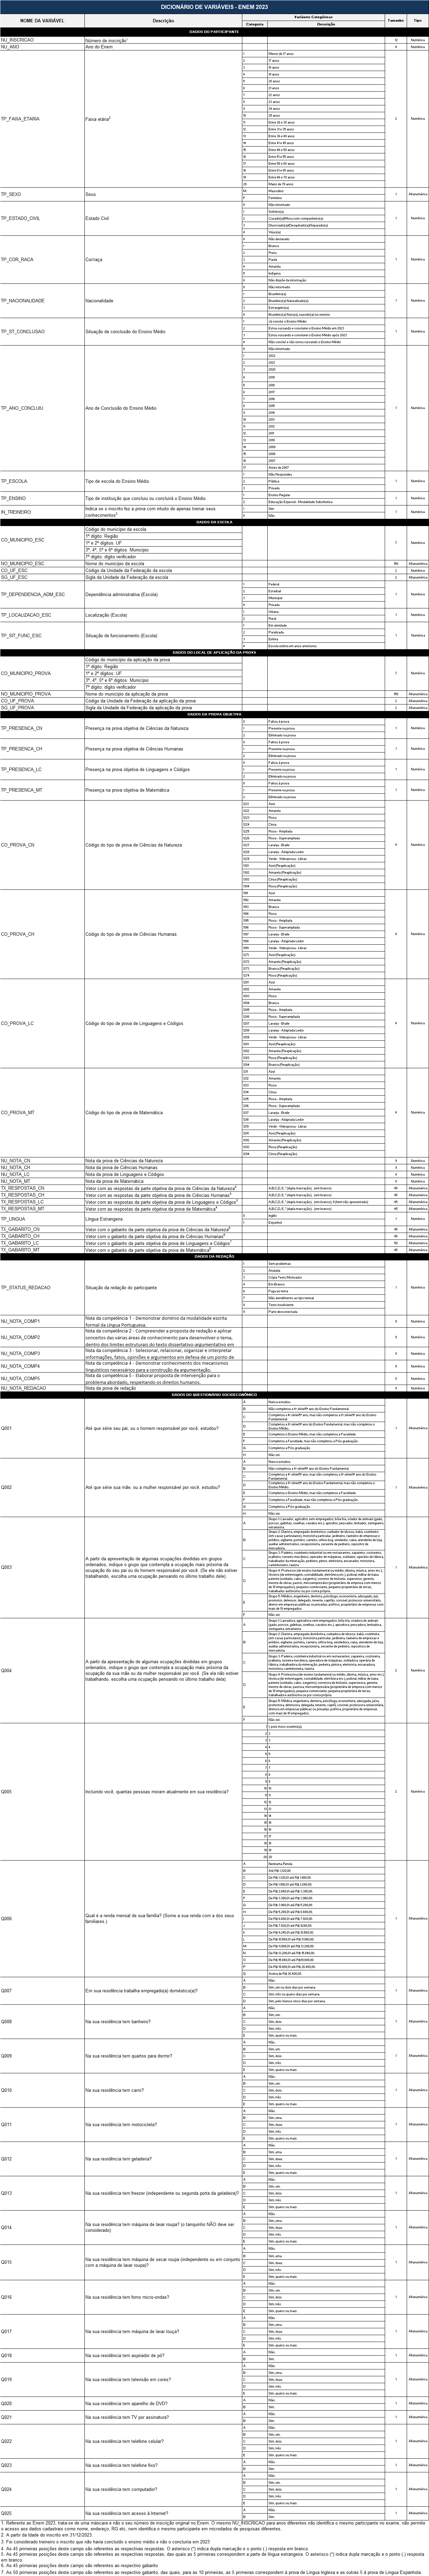